# **ECE 5307 Excerise Set 6**
    Authored by Brian Lesko, a Graduate Researcher and Teaching Associate, a Masters of mechanical engineering student, studying mechatronic controls, robotics, and machine learning.

    This documenet is originally an interactive python notebook

    Contents: 
    
    
 

1a 

Making Random Training Data

In [129]:
import numpy as np
# create a random matrix with p predictors and n samples to use as training data
p = 10
n = 100
X = np.random.rand(n,p)

# convert X to a pandas df
import pandas as pd
X = pd.DataFrame(X)
#print the first 2 rows of X_df
print('X = ', X[0:2])

#print the size of X_df
print('X size = ', X.shape)


X =            0         1         2         3         4         5         6  \
0  0.270235  0.014499  0.926122  0.556213  0.011771  0.827341  0.047094   
1  0.555763  0.558702  0.829216  0.552561  0.823174  0.775014  0.407019   

          7         8         9  
0  0.503951  0.710150  0.559045  
1  0.704150  0.140623  0.443917  
X size =  (100, 10)


Defining the model with random weight parameters 

In [130]:
# create a random vector of weights
w = np.random.rand(p+1,1)

#print the size of w
print('w = ', w.shape)

# create a random vector of targets 
y = np.random.rand(n,1)


w =  (11, 1)


1c) 

Computing the loss and gradient

In [131]:
def Jeval_param(w,X,y):
    # create a matrix A with the column of ones and then the predictors using hstack
    A = np.hstack((np.ones((X.shape[0],1)),X))

    # the loss is the binary cross entropy
    z = np.dot(A,w)
    J = np.sum(y-1/z)**2

    # Gradient of the loss
    df_dz = 2*(y-1/z)*(-1/z**2)
    # compute the gradient of J
    Jgrad = A.T.dot(df_dz)

    return J,Jgrad

# Test the function
J,Jgrad = Jeval_param(w,X,y)

# print "the the cost J, or the model penalty, at X given the oberseved y is" 
print('The Cost at X is J = ', J)
print('Jgrad = ', Jgrad.shape)

# check if the dimensions of Jgrad are equal to the dimensions of w
if Jgrad.shape == w.shape:
    print('The dimensions of Jgrad and w are equal')
else:
    print('The dimensions of Jgrad and w are not equal')





The Cost at X is J =  323.0839963689794
Jgrad =  (11, 1)
The dimensions of Jgrad and w are equal


1d) 

In [132]:
def gd(Jeval, lr, winit, nit, X, y):
    #initialize the weights to winit
    w0 = winit

    #initialize the history
    hist = {'J': [], 'w': []}

    #use a single for loop to minimize J using gradient descent
    for i in range(nit):

        # Evaluate the cost function and gradient
        J0, Jgrad0 = Jeval(w0, X, y)

        # Take a gradient descent step
        w0 = w0 - lr * Jgrad0

        # Append the cost function and weights to the history
        hist['J'].append(J0)
        hist['w'].append(w0)

    return w0, J0, hist


# test the gradient descent function
lr = 1e-4
nit = 2000
import numpy.random as rng
winit = rng.standard_normal((p+1,1))
w_out, J_out, hist = gd(Jeval_param, lr, winit, nit, X, y)

# Check that if gradient is zero
print('After gradient descent, the gradient is = ', J_out)

# Check the last few entries of the gradient descent history
print('The last few entries of the gradient descent history are = ', hist['J'][-5:])


After gradient descent, the gradient is =  2473.1213871932705
The last few entries of the gradient descent history are =  [2473.12138719279, 2473.12138719291, 2473.12138719303, 2473.12138719315, 2473.1213871932705]


The data is random so I dont expect to get a zero gradient after the number of interations given

### Problem 2

In [133]:
def Jeval_param(w,b,X,y):
    # create a matrix A with the column of ones and then the predictors using hstack
    A = np.hstack((np.ones((X.shape[0],1)),X))

    # The prediction yhat is a vector of predictions
    yhat = np.dot(A,w)
    # print the shape of yhat
    print('X = ', X.shape)
    print('yhat = ', yhat.shape)
    ly = np.log(y) 
    lyhat = np.log(yhat)

    # The cost function is the sum of the squared errors
    J = np.sum(ly-lyhat)**2

    # Gradients of the loss
    dj_dw = 2*(ly-lyhat)*(-1/yhat)*A
    print('The shape of dj_dw is = ', dj_dw.shape)
    dj_db = 2*(ly-lyhat)*(-1/yhat)

    return J,dj_dw,dj_db

# test values 
# b is the first entry of w
b = w[0]
# w is the rest of the entries of w

# Test the function
J,dj_dw,dj_db = Jeval_param(w,b,X,y)
print('The Cost at X is J = ', J)
print('W = ', w.shape)
print('dj_dw = ', dj_dw.shape)
print('dj_db = ', dj_db.shape)

X =  (100, 10)
yhat =  (100, 1)
The shape of dj_dw is =  (100, 11)
The Cost at X is J =  48899.69925144309
W =  (11, 1)
dj_dw =  (100, 11)
dj_db =  (100, 1)


### Problem 3

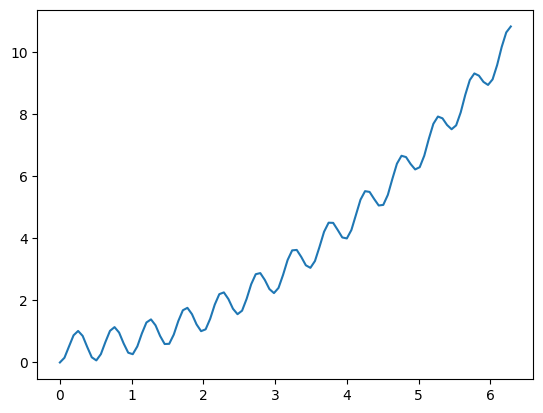

In [134]:
pi = np.pi
x = np.linspace(0, 2*pi, 100)

f = 1/4 * x**2 + np.sin(2*pi*x)**2

# plot the function
import matplotlib.pyplot as plt
plt.plot(x,f)
plt.show()

